In [1]:
import scipy.io
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mne 

# Load MATLAB EEG signal file
mat_data = scipy.io.loadmat('/Users/kimying/Downloads/FYP /Data/filtered_data/Arithmetic_sub_1_trial1.mat')
mat_data

# Print EEG data
con_list = [[element for element in upperElement] for upperElement in mat_data['Clean_data']]
len(con_list[0])

3200

In [2]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clean_data'])

In [3]:
mat_data['Clean_data']
len(mat_data['Clean_data'][1])

3200

In [4]:
import os
os.chdir("/Users/kimying/Downloads/FYP /Data/filtered_data")
files = os.listdir()

In [5]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [6]:
files = sorted(files)
files = [file for file in files if file != ".DS_Store" and "Relax" not in file]


In [7]:
files.sort(key=natural_keys)


## CODE FOR EEG 

Creating RawArray with float64 data, n_channels=32, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    24.992 secs
Ready.


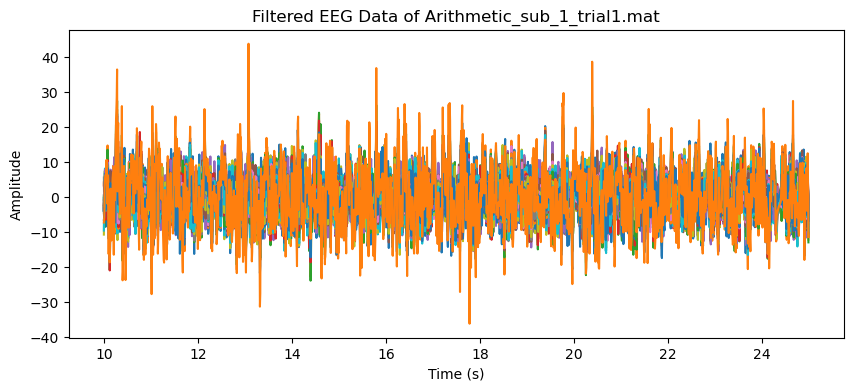

Creating RawArray with float64 data, n_channels=32, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    24.992 secs
Ready.


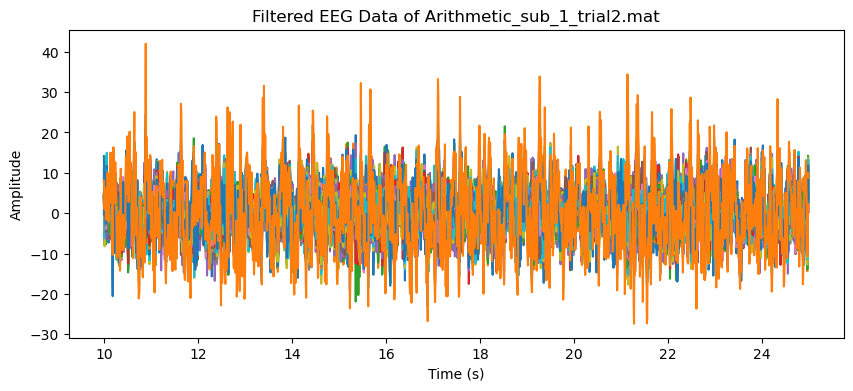

Creating RawArray with float64 data, n_channels=32, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    24.992 secs
Ready.


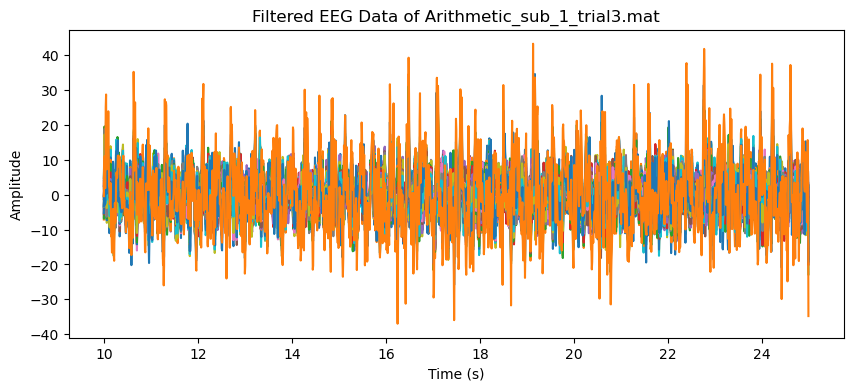

In [8]:
from scipy.io import loadmat

# Load the MATLAB .mat file
for file in files[:3]:
    data = loadmat('/Users/kimying/Downloads/FYP /Data/filtered_data/' + file)

    # Extract the EEG data and sampling frequency from the loaded data
    eeg_data = data['Clean_data']
    sfreq = 128

    channels = "CZ, FZ, Fp1, F7, F3, FC1, C3, FC5, FT9, T7, CP5, CP1, P3, P7, PO9, O1, PZ, OZ, O2, PO10, P8, P4, CP2, CP6, T8, FT10, FC6, C4, FC2, F4, F8, Fp2"
    channels = channels.split(',')
    channels = [i.strip() for i in channels]

    # Transpose the EEG data
    if eeg_data.shape[0] > eeg_data.shape[1]:
        eeg_data = eeg_data.T

    # Check if number of channels matches the data shape
    if len(channels) != eeg_data.shape[0]:
        raise ValueError("Number of channels does not match the data shape.")

    # Create a RawArray object from the EEG data
    info = mne.create_info(ch_names=channels, sfreq=sfreq, ch_types='eeg')
    raw = mne.io.RawArray(eeg_data, info)

    # Specify the time range for the plot (in seconds)
    start_time = 10
    end_time = 35

    # Extract the data and time vector for the specified time range
    data, times = raw[:, int(start_time * sfreq):int(end_time * sfreq)]

    # Create the plot
    plt.figure(figsize=(10, 4))
    plt.plot(times, data.T)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered EEG Data of ' + file)
    plt.show()


In [9]:
import plotly.graph_objs as go
import plotly.offline as py

# Create the Plotly plot
trace_data = []
for i in range(data.shape[0]):
        trace = go.Scatter(x=times, y=data[i, :], name=channels[i])
        trace_data.append(trace)

layout = go.Layout(title=dict(text=f'40 Participants - Filtered EEG Data', x=0.5),
                       xaxis=dict(title='Time (s)'),
                       yaxis=dict(title='Amplitude'),
                       showlegend=True)

fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig)

## CODE FOR LIST

In [10]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

/opt/anaconda3


In [11]:
from scipy.io import loadmat
from statistics import mean
import pandas as pd

channels =  "CZ, FZ, Fp1, F7, F3, FC1, C3, FC5, FT9, T7, CP5, CP1, P3, P7, PO9, O1, PZ, OZ, O2, PO10, P8, P4, CP2, CP6, T8, FT10, FC6, C4, FC2, F4, F8, Fp2"
channels = channels.split(',')
channels = [i.strip() for i in channels]

df = pd.DataFrame(columns = channels)

big_list = []
med_list = []

for i, file in enumerate(files):
    mat_data = scipy.io.loadmat(file)
    con_list = [[element for element in upperElement] for upperElement in mat_data['Clean_data']]
    med_list = []
    for channel in con_list:
        med_list.append(channel)
    big_list.append(med_list)


In [12]:
# Root Mean Square

import numpy as np
def root_mean_square(cell):
    cell = np.array(cell)
    compressed_value = np.sqrt(np.mean(np.square(cell)))
    return compressed_value

In [13]:
rms_value = [[root_mean_square(col) for col in row] for row in big_list]
rms_value

[[6.450040488062205,
  7.1727974129449255,
  7.028824845524995,
  6.132951039375373,
  5.196021763841392,
  5.225894428110214,
  5.028515897722225,
  3.8599766298063822,
  4.811250642177218,
  4.787534035178325,
  5.476090199860754,
  4.808803798004642,
  4.632803907054638,
  4.381084652398587,
  5.438554743739637,
  4.878738203692972,
  4.635568096517011,
  4.773118154459839,
  5.510318182229782,
  5.267993066398961,
  4.725492656784076,
  4.992652159529016,
  5.353756025075459,
  5.028395460053975,
  4.807784643260163,
  5.226673158943687,
  5.085981904444927,
  5.335458139553369,
  5.53099669968322,
  6.0249469446707,
  6.979418789378087,
  9.34442179991598],
 [6.102751477342561,
  7.039937853730357,
  7.1233979978919635,
  6.22994428332485,
  4.819120805539932,
  4.8619562979023,
  4.613098115915459,
  3.7252795308732334,
  4.443434253383094,
  4.351942503195099,
  5.023552907338513,
  4.693526784097931,
  4.464663538064195,
  4.627831085586326,
  5.807095790131146,
  4.99892469850

In [14]:
len(rms_value[0])

32

In [15]:
df_channels = pd.DataFrame(rms_value, columns=channels)
df_channels

CZ        FZ        Fp1        F7        F3       FC1        C3  \
0    6.450040  7.172797   7.028825  6.132951  5.196022  5.225894  5.028516   
1    6.102751  7.039938   7.123398  6.229944  4.819121  4.861956  4.613098   
2    6.448562  7.520387   7.264964  6.324685  5.162297  5.361932  5.106680   
3    5.766178  5.816225   6.027814  5.856751  5.188532  5.468948  5.046778   
4    5.541318  5.869106   6.441716  5.983001  4.624441  4.944027  4.657055   
..        ...       ...        ...       ...       ...       ...       ...   
355  6.946395  7.055732   7.235650  7.140913  6.315252  6.181146  6.016252   
356  7.158433  7.361401   7.535000  7.481525  6.433954  6.060635  5.680680   
357  8.172989  9.462338  10.217094  9.408805  7.696014  7.957173  7.871333   
358  6.978329  8.294616   8.353866  8.086341  6.871684  7.237671  6.517771   
359  6.030971  7.208562   7.730135  7.526633  6.502191  6.631472  5.816272   

          FC5       FT9        T7  ...       CP2       CP6        T8  \
0    3.859977  4.811251  4.787534  ...  5.353756  5.028395  4.807785   
1    3.725280  4.443434  4.351943  ...  5.376603  5.189717  5.141612   
2    3.809407  3.890613  3.620590  ...  6.105915  5.568721  4.966388   
3    4.436948  4.443827  4.669045  ...  5.419906  5.316131  6.206829   
4    3.878573  4.174203  3.969232  ...  4.861130  4.732488  5.570871   
..        ...       ...       ...  ...       ...       ...       ...   
355  5.593482  5.115922  4.247606  ...  6.311726  6.326071  6.934419   
356  5.424618  5.123213  4.586804  ...  6.395282  6.709444  7.719456   
357  7.063925  7.019705  7.201037  ...  8.410658  8.357859  8.473893   
358  5.597716  5.803351  6.156130  ...  7.301447  6.927465  6.903589   
359  4.828370  5.008451  5.559365  ...  6.904424  6.659421  6.404091   

         FT10       FC6        C4       FC2        F4        F8        Fp2  
0    5.226673  5.085982  5.335458  5.530997  6.024947  6.979419   9.344422  
1    5.499120  5.442435  5.275147  5.225183  5.800138  7.123050   9.982144  
2    5.329660  5.687711  5.851460  5.834686  6.489603  7.900016  10.964889  
3    6.235357  5.664717  5.350623  5.411551  5.670187  6.653897   7.674133  
4    5.602542  5.403976  5.220398  5.379535  5.343175  6.447071   8.686703  
..        ...       ...       ...       ...       ...       ...        ...  
355  6.322656  6.170330  6.619835  7.444721  7.452172  7.535079   8.908534  
356  7.125551  6.472355  6.588853  7.693782  8.056194  8.470056  10.155378  
357  8.297099  7.551825  7.740123  8.643445  9.347590  9.929985  11.523928  
358  7.048501  6.367654  6.497257  7.302317  8.179523  8.658519  10.012994  
359  6.343907  5.739557  6.108040  6.724562  7.276961  7.695165   9.577050  

[360 rows x 32 columns]

In [16]:
targets = pd.read_excel("/Users/kimying/Downloads/FYP /Data/scales.xls")
targets = targets.iloc[:,1:]

new_header = targets.iloc[0] #first row for the header
targets = targets[1:]
targets.columns = new_header 

targets


0  Maths Symmetry Stroop Maths Symmetry Stroop Maths Symmetry Stroop
1      6        3      3     7        5      2     4        7      4
2      3        4      5     3        4      4     7        5      3
3      5        3      4     3        5      5     8        7      5
4      5        3      4     3        5      2     7        5      5
5      6        6      6     5        3      2     5        7      3
6      5        4      2     4        3      3     8        6      5
7      5        5      4     3        3      3     6        3      6
8      3        5      4     6        6      3     5        6      3
9      3        6      4     4        4      4     7        4      6
10     3        4      4     4        5      3     6        4      5
11     7        3      4     6        5      5     5        6      5
12     5        7      2     5        4      5     8        6      3
13     3        5      3     3        4      2     3        5      1
14     3        4      3     6        4      2     6        3      4
15     9        6      5     7        5      3     6        5      5
16     4        4      1     5        6      1     8        5      6
17     8        9      8     6        8      4     7        7      6
18     6        5      6     5        6      5     9        6      7
19     4        6      6     2        4      3     4        1      3
20    10        9      7    10        9      5    10        8      6
21     7        8      9     8        8      9     7        8      9
22     9        8      5     8        8      6     7        6      5
23     3        2      1     4        2      1     8        4      5
24     4        2      1     2        1      1     5        7      4
25     2        1      2     2        1      2     5        7      5
26     6        7      8     6        8      7     4        5      6
27     5        5      3     3        4      2     5        3      3
28     7        8      7     7        7      5     6        5      4
29     6        7      6     8        7      6     6        6      5
30     7        6      5     8        6      5     7        5      4
31    10        8      4     9        7      3     6        3      7
32     5        5      1     1        2      1     7        6      3
33     5        4      3     3        2      2     8        3      6
34     2        3      1     3        1      1     2        2      3
35     6        5      1     5        2      1     4        6      5
36     4        4      6     5        4      3     5        5      5
37     6        5      4     5        3      2     8        4      6
38     6        4      5     5        6      3     4        5      3
39     6        4      3     5        5      3     6        3      5
40     3        5      5     4        6      5     4        4      3

In [17]:
arith = []
counter = 0
for i in range(len(targets)):
    for j in range(0, 9, 3):
        arith.append(targets.iloc[i,j])
arith

[6,
 7,
 4,
 3,
 3,
 7,
 5,
 3,
 8,
 5,
 3,
 7,
 6,
 5,
 5,
 5,
 4,
 8,
 5,
 3,
 6,
 3,
 6,
 5,
 3,
 4,
 7,
 3,
 4,
 6,
 7,
 6,
 5,
 5,
 5,
 8,
 3,
 3,
 3,
 3,
 6,
 6,
 9,
 7,
 6,
 4,
 5,
 8,
 8,
 6,
 7,
 6,
 5,
 9,
 4,
 2,
 4,
 10,
 10,
 10,
 7,
 8,
 7,
 9,
 8,
 7,
 3,
 4,
 8,
 4,
 2,
 5,
 2,
 2,
 5,
 6,
 6,
 4,
 5,
 3,
 5,
 7,
 7,
 6,
 6,
 8,
 6,
 7,
 8,
 7,
 10,
 9,
 6,
 5,
 1,
 7,
 5,
 3,
 8,
 2,
 3,
 2,
 6,
 5,
 4,
 4,
 5,
 5,
 6,
 5,
 8,
 6,
 5,
 4,
 6,
 5,
 6,
 3,
 4,
 4]

In [18]:
mirror = []
counter = 0
for i in range(len(targets)):
    for j in range(1, 9, 3):
        mirror.append(targets.iloc[i,j])
mirror

[3,
 5,
 7,
 4,
 4,
 5,
 3,
 5,
 7,
 3,
 5,
 5,
 6,
 3,
 7,
 4,
 3,
 6,
 5,
 3,
 3,
 5,
 6,
 6,
 6,
 4,
 4,
 4,
 5,
 4,
 3,
 5,
 6,
 7,
 4,
 6,
 5,
 4,
 5,
 4,
 4,
 3,
 6,
 5,
 5,
 4,
 6,
 5,
 9,
 8,
 7,
 5,
 6,
 6,
 6,
 4,
 1,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 6,
 2,
 2,
 4,
 2,
 1,
 7,
 1,
 1,
 7,
 7,
 8,
 5,
 5,
 4,
 3,
 8,
 7,
 5,
 7,
 7,
 6,
 6,
 6,
 5,
 8,
 7,
 3,
 5,
 2,
 6,
 4,
 2,
 3,
 3,
 1,
 2,
 5,
 2,
 6,
 4,
 4,
 5,
 5,
 3,
 4,
 4,
 6,
 5,
 4,
 5,
 3,
 5,
 6,
 4]

In [19]:
stroop = []
counter = 0
for i in range(len(targets)):
    for j in range(2, 9, 3):
        stroop.append(targets.iloc[i,j])
stroop

[3,
 2,
 4,
 5,
 4,
 3,
 4,
 5,
 5,
 4,
 2,
 5,
 6,
 2,
 3,
 2,
 3,
 5,
 4,
 3,
 6,
 4,
 3,
 3,
 4,
 4,
 6,
 4,
 3,
 5,
 4,
 5,
 5,
 2,
 5,
 3,
 3,
 2,
 1,
 3,
 2,
 4,
 5,
 3,
 5,
 1,
 1,
 6,
 8,
 4,
 6,
 6,
 5,
 7,
 6,
 3,
 3,
 7,
 5,
 6,
 9,
 9,
 9,
 5,
 6,
 5,
 1,
 1,
 5,
 1,
 1,
 4,
 2,
 2,
 5,
 8,
 7,
 6,
 3,
 2,
 3,
 7,
 5,
 4,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 3,
 7,
 1,
 1,
 3,
 3,
 2,
 6,
 1,
 1,
 3,
 1,
 1,
 5,
 6,
 3,
 5,
 4,
 2,
 6,
 5,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 3]

In [20]:
final_target = arith + mirror + stroop
df_channels['target'] = final_target
df_channels

CZ        FZ        Fp1        F7        F3       FC1        C3  \
0    6.450040  7.172797   7.028825  6.132951  5.196022  5.225894  5.028516   
1    6.102751  7.039938   7.123398  6.229944  4.819121  4.861956  4.613098   
2    6.448562  7.520387   7.264964  6.324685  5.162297  5.361932  5.106680   
3    5.766178  5.816225   6.027814  5.856751  5.188532  5.468948  5.046778   
4    5.541318  5.869106   6.441716  5.983001  4.624441  4.944027  4.657055   
..        ...       ...        ...       ...       ...       ...       ...   
355  6.946395  7.055732   7.235650  7.140913  6.315252  6.181146  6.016252   
356  7.158433  7.361401   7.535000  7.481525  6.433954  6.060635  5.680680   
357  8.172989  9.462338  10.217094  9.408805  7.696014  7.957173  7.871333   
358  6.978329  8.294616   8.353866  8.086341  6.871684  7.237671  6.517771   
359  6.030971  7.208562   7.730135  7.526633  6.502191  6.631472  5.816272   

          FC5       FT9        T7  ...       CP6        T8      FT10  \
0    3.859977  4.811251  4.787534  ...  5.028395  4.807785  5.226673   
1    3.725280  4.443434  4.351943  ...  5.189717  5.141612  5.499120   
2    3.809407  3.890613  3.620590  ...  5.568721  4.966388  5.329660   
3    4.436948  4.443827  4.669045  ...  5.316131  6.206829  6.235357   
4    3.878573  4.174203  3.969232  ...  4.732488  5.570871  5.602542   
..        ...       ...       ...  ...       ...       ...       ...   
355  5.593482  5.115922  4.247606  ...  6.326071  6.934419  6.322656   
356  5.424618  5.123213  4.586804  ...  6.709444  7.719456  7.125551   
357  7.063925  7.019705  7.201037  ...  8.357859  8.473893  8.297099   
358  5.597716  5.803351  6.156130  ...  6.927465  6.903589  7.048501   
359  4.828370  5.008451  5.559365  ...  6.659421  6.404091  6.343907   

          FC6        C4       FC2        F4        F8        Fp2  target  
0    5.085982  5.335458  5.530997  6.024947  6.979419   9.344422       6  
1    5.442435  5.275147  5.225183  5.800138  7.123050   9.982144       7  
2    5.687711  5.851460  5.834686  6.489603  7.900016  10.964889       4  
3    5.664717  5.350623  5.411551  5.670187  6.653897   7.674133       3  
4    5.403976  5.220398  5.379535  5.343175  6.447071   8.686703       3  
..        ...       ...       ...       ...       ...        ...     ...  
355  6.170330  6.619835  7.444721  7.452172  7.535079   8.908534       3  
356  6.472355  6.588853  7.693782  8.056194  8.470056  10.155378       5  
357  7.551825  7.740123  8.643445  9.347590  9.929985  11.523928       5  
358  6.367654  6.497257  7.302317  8.179523  8.658519  10.012994       5  
359  5.739557  6.108040  6.724562  7.276961  7.695165   9.577050       3  

[360 rows x 33 columns]

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extract features for PCA
features = df_channels

# Standardize the features 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of components you want to keep
n_components = 10 

# Apply PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame to store the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target variable to the principal components DataFrame
pc_df['target'] = df_channels['target']

# Display the DataFrame with principal components
print(pc_df)

# Variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)


          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -5.282629 -0.803028 -0.074535  0.713779  0.117343  0.567111  0.750318   
1   -5.295789 -1.140321  0.527467  0.970375 -0.216974  0.053572  0.514085   
2   -4.709153 -0.357349  0.162863 -0.845306  0.055571 -0.056412  0.246419   
3   -5.570167  0.825368 -0.423541  0.397811  0.776619 -0.339871 -0.504725   
4   -6.572874  0.240896 -0.064022 -0.250310  0.783907 -0.351217 -0.277464   
..        ...       ...       ...       ...       ...       ...       ...   
355 -3.090773  0.595087 -1.405784 -0.502798  0.164651  0.125608 -0.630332   
356 -1.761356  0.025015 -0.993072  0.079291 -0.499686 -0.516985 -0.468717   
357  3.947547 -0.358982 -0.981117  0.409919  0.141973  0.255303  0.248447   
358 -0.226074 -0.387867 -0.696784  0.493711  0.172253  0.634214  0.139655   
359 -2.181686  0.256972 -0.662909 -0.042382  0.708675  0.381831 -0.021327   

          PC8       PC9      PC10  target  
0    0.028748 -0.049631 -0.0527

## CODE FOR FEATURE SELECTION

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pc_df, pc_df["target"], test_size=0.2, random_state=42)

# Reshape the feature vectors for LSTM input
x_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
x_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)  
print("Testing set shape:", x_test.shape, y_test.shape)  


Training set shape: (288, 1, 11) (288,)
Testing set shape: (72, 1, 11) (72,)


In [23]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = svm.predict(X_test)
y_test


224    6
42     9
285    1
302    9
56     4
      ..
199    4
334    1
93     5
198    5
197    5
Name: target, Length: 72, dtype: int64

Accuracy: 0.6388888888888888
Precision: 0.6422449832775919
Recall: 0.40935425685425686
F1 score: 0.3753831218362111


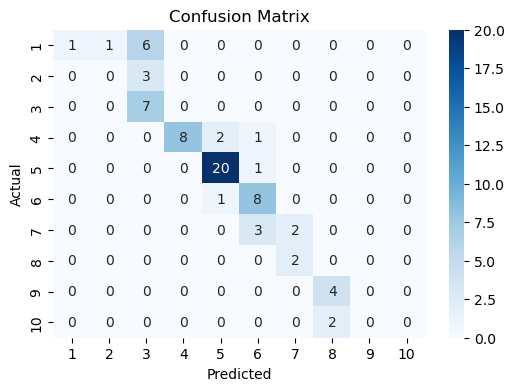

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision 
precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
print("Precision:", precision)

# Calculate recall 
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate F1 score 
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score:", f1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# change confusion matrix to a DataFrame 
classes = np.unique(y_test)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
